# First Run Random forest model given all cytokene data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from helper_functions.helper import model_with_shap
import shap
import umap

In [2]:
# Load the antibody titers data (response profile)
abtiters = pd.read_csv('../data/abtiters.csv')

# Load the cytokines data
cytokines = pd.read_csv('../data/cytokines_data.csv')

# Load the cyto data
cyto = pd.read_csv('../data/cyto_data.csv') # WBC Day 0,RBC Day 0,HGB Day 0,HCT Day 0,PLT Day 0,%LYM Day 0,%MON Day 0,%GRA Day 0

In [3]:
# Calculate the difference between Day 21 and Day 0 antibody titers
abtiters['titer_response'] = abtiters['Day 21'] - abtiters['Day 0']
threshold = 100  # I chose 100 based on the plot (a little trail and error)
abtiters['response_label'] = abtiters['titer_response'].apply(lambda x: 'high' if x > threshold else 'low')

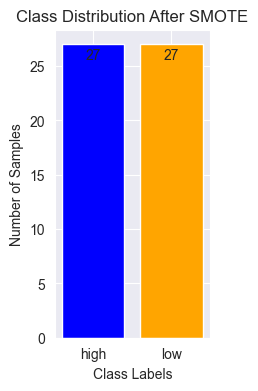

Accuracy: 0.727
f1-macro avg: 0.718
f1-weighted avg: 0.732
precision-macro avg: 0.717
precision-weighted avg: 0.748
True Negatives (TN): 5.00 -> Correctly predicted negative class.
False Negatives (FN): 1.00 -> Incorrectly predicted negative class.
True Positives (TP): 3.00 -> Correctly predicted positive class.
False Positives (FP): 2.00 -> Incorrectly predicted positive class.


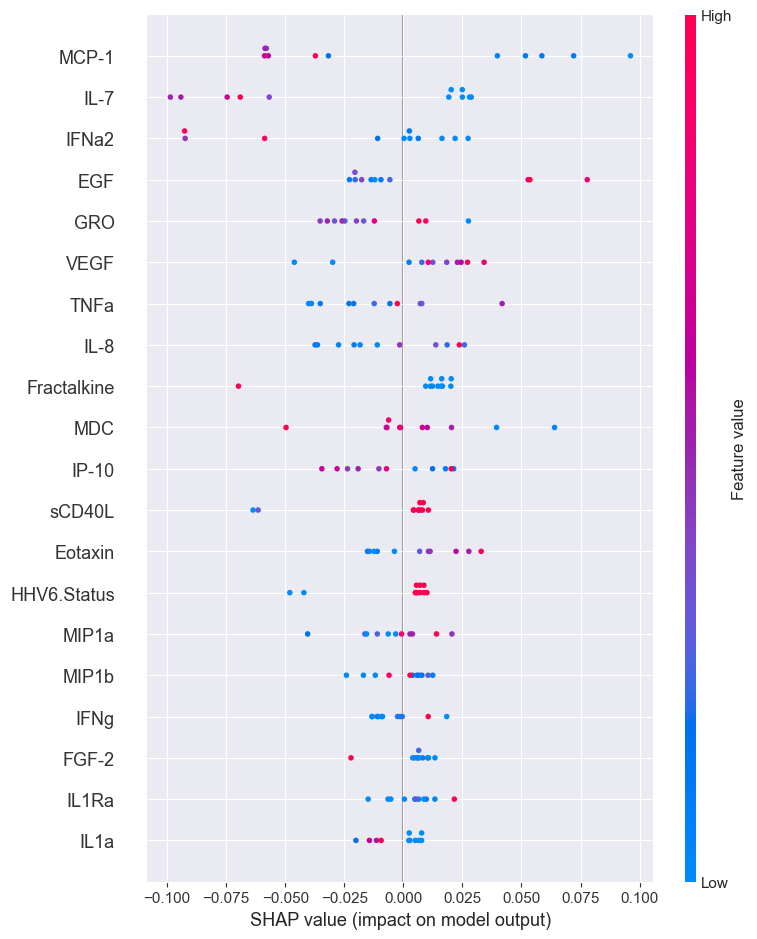

In [4]:
merged_data = pd.merge(abtiters, cytokines, on='Vaccinee')

# Drop non-numeric columns
X = merged_data.drop(columns=['Day 0', 'Day 21','titer_response', 'Vaccinee', 'response_label', 'vaccine'])

# Target variable (make sure it's encoded as numerical if not already)
y = merged_data['response_label']

model_with_shap(X, y, 
                smote=True, 
                model=RandomForestClassifier(n_estimators=100, random_state=42),
                shap_explainer = shap.TreeExplainer,
                random_state=42)

explained:
Y-axis (Features): This shows the list of features (e.g., MCP-1, TNFa, GRO, etc.) in the dataset. The features at the top of the plot are the most important ones in terms of their contribution to the model predictions.
X-axis (SHAP Value): This axis represents the SHAP value, which shows the impact of each feature on the model's output. The further a point is from zero (either positive or negative), the more that feature impacts the prediction for that specific sample.
 - Positive SHAP values indicate that the feature pushes the prediction towards a higher outcome.
 - Negative SHAP values indicate that the feature pushes the prediction towards a lower outcome.

MCP-1 and TNFa have strong predictive importance for both high and low outcomes, but high values of MCP-1 tend to push predictions higher.
Other features, like IFNg or MDC, also influence predictions, but with less magnitude compared to the top features.

Looking at the results:
 - If a patient has a high level of MCP-1 and TNFa, the model will likely predict a higher immune response.
 - For a lower value like MDC, the red and blue dots are more balanced between the left and right sides. This suggests that both high and low values of MDC contribute to predictions in a more mixed manner.
 - IL1Ra or TNFb have less spread, meaning they don’t influence the model’s predictions as strongly.

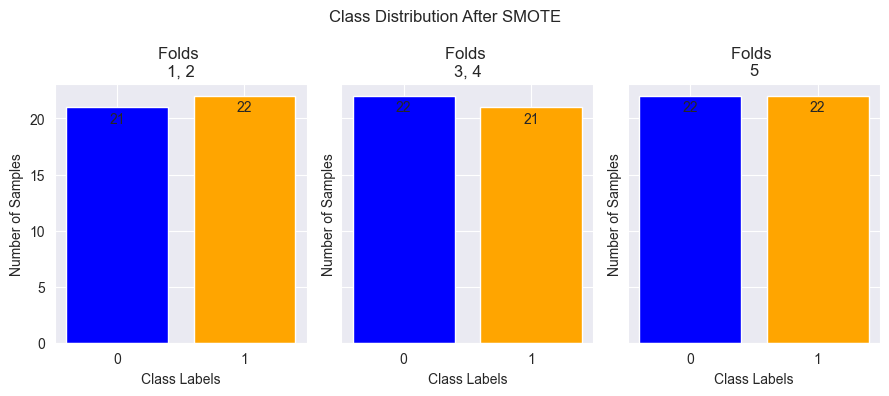

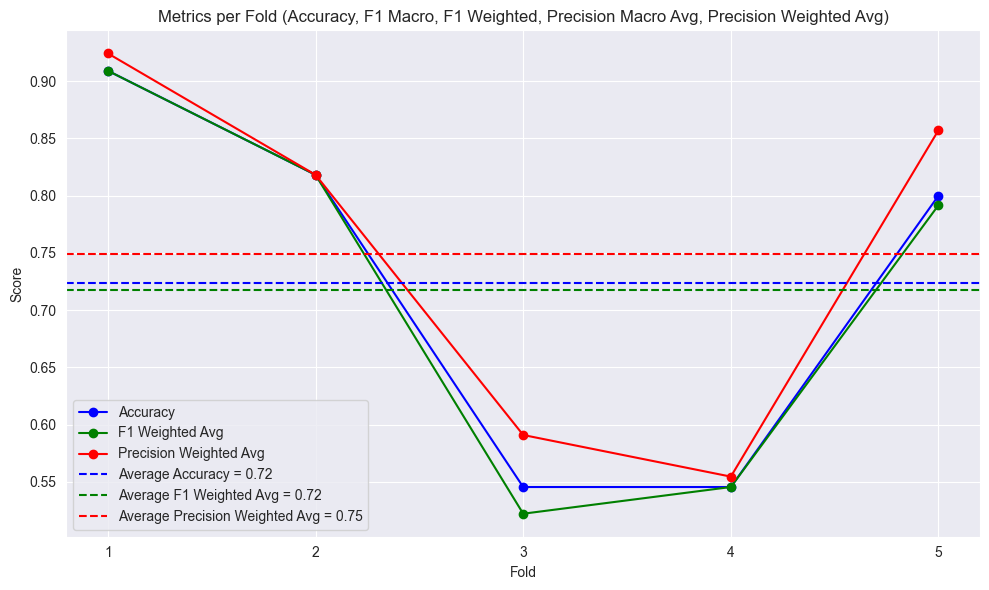

True Negatives (TN): 4.40 -> Correctly predicted negative class.
False Negatives (FN): 2.00 -> Incorrectly predicted negative class.
True Positives (TP): 3.40 -> Correctly predicted positive class.
False Positives (FP): 1.00 -> Incorrectly predicted positive class.


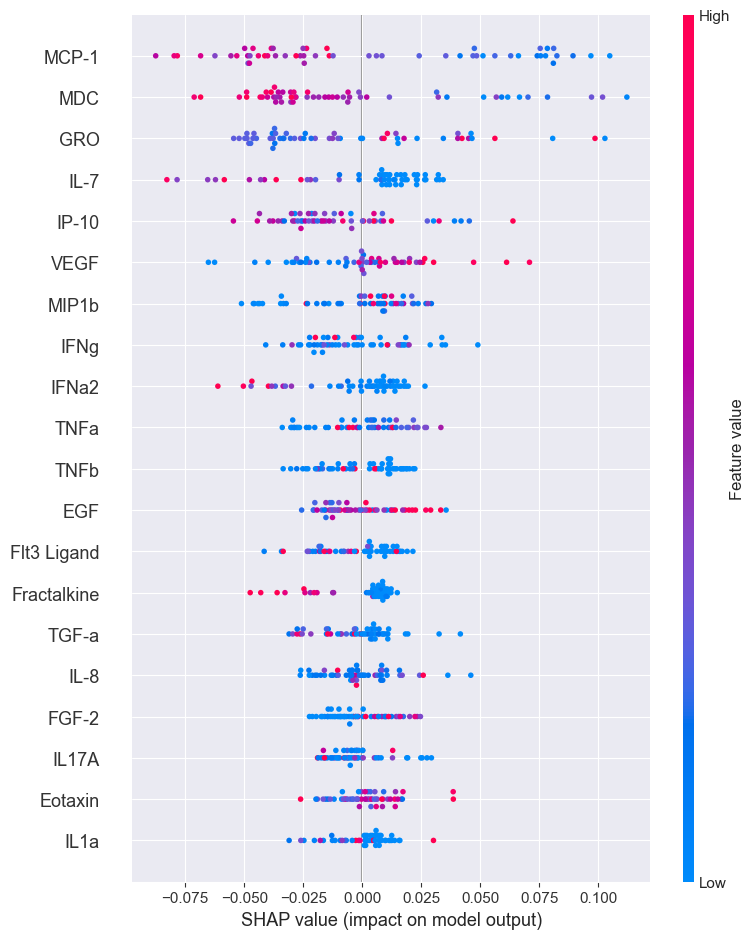

In [5]:
# Drop non-numeric columns
X = merged_data.drop(columns=['Day 0', 'Day 21', 'titer_response', 'Vaccinee', 'response_label', 'vaccine'])

# Target variable (make sure it's encoded as numerical if not already)
y = merged_data['response_label']

model_with_shap(X, y, 
                crossval="K-fold", 
                n_splits=5, 
                smote=True, 
                model=RandomForestClassifier(n_estimators=100, random_state=42),
                shap_explainer = shap.TreeExplainer,
                random_state=42
                )

if we look at the classification with and without cross fitting:
 - Common Features: MCP-1 appears to be important in both the multi-fold and single-fold plots, indicating that it is a consistently important feature across the data splits.
 - Stability: The features at the top of the multi-fold plot (MCP-1, GRO, MDC) tend to show consistent importance, while the dot plot (single fold) reveals that some features (e.g., IL-7) may only be important in specific data splits.

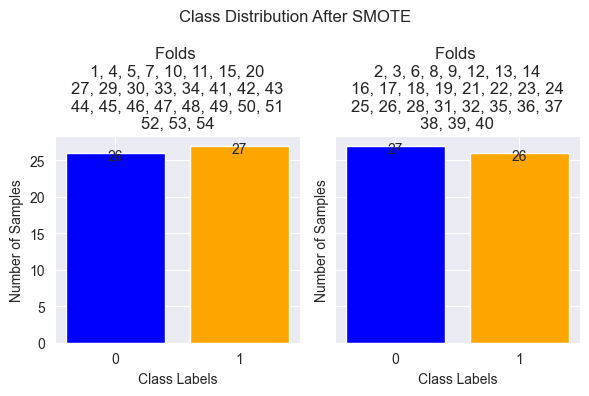

Accuracy: 0.685
f1-macro avg: 0.684
f1-weighted avg: 0.684
precision-macro avg: 0.688
precision-weighted avg: 0.688
True Negatives (TN): 20.00 -> Correctly predicted negative class.
False Negatives (FN): 10.00 -> Incorrectly predicted negative class.
True Positives (TP): 17.00 -> Correctly predicted positive class.
False Positives (FP): 7.00 -> Incorrectly predicted positive class.


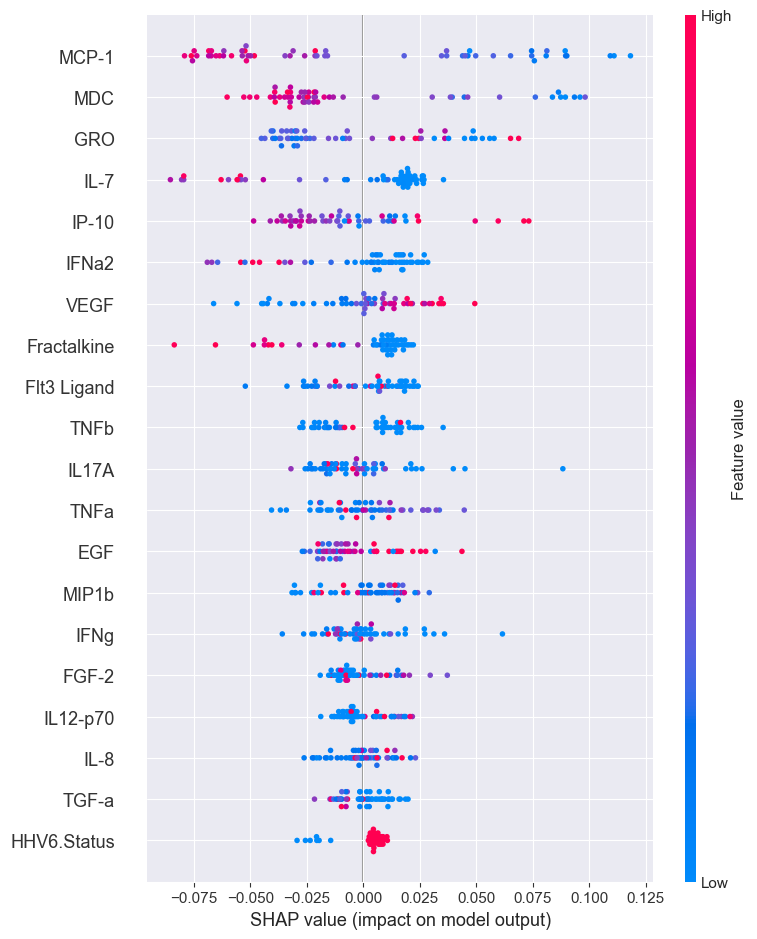

In [6]:
# Drop non-numeric columns
X = merged_data.drop(columns=['Day 0', 'Day 21', 'titer_response', 'Vaccinee', 'response_label', 'vaccine'])

# Target variable (make sure it's encoded as numerical if not already)
y = merged_data['response_label']

model_with_shap(X, y, 
                crossval="Leave-One-Out", 
                smote=True, 
                model=RandomForestClassifier(n_estimators=100, random_state=42),
                shap_explainer = shap.TreeExplainer,
                random_state=42
                )

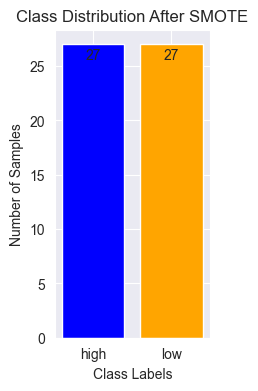

Accuracy: 0.636
f1-macro avg: 0.607
f1-weighted avg: 0.636
precision-macro avg: 0.607
precision-weighted avg: 0.636
True Negatives (TN): 5.00 -> Correctly predicted negative class.
False Negatives (FN): 2.00 -> Incorrectly predicted negative class.
True Positives (TP): 2.00 -> Correctly predicted positive class.
False Positives (FP): 2.00 -> Incorrectly predicted positive class.


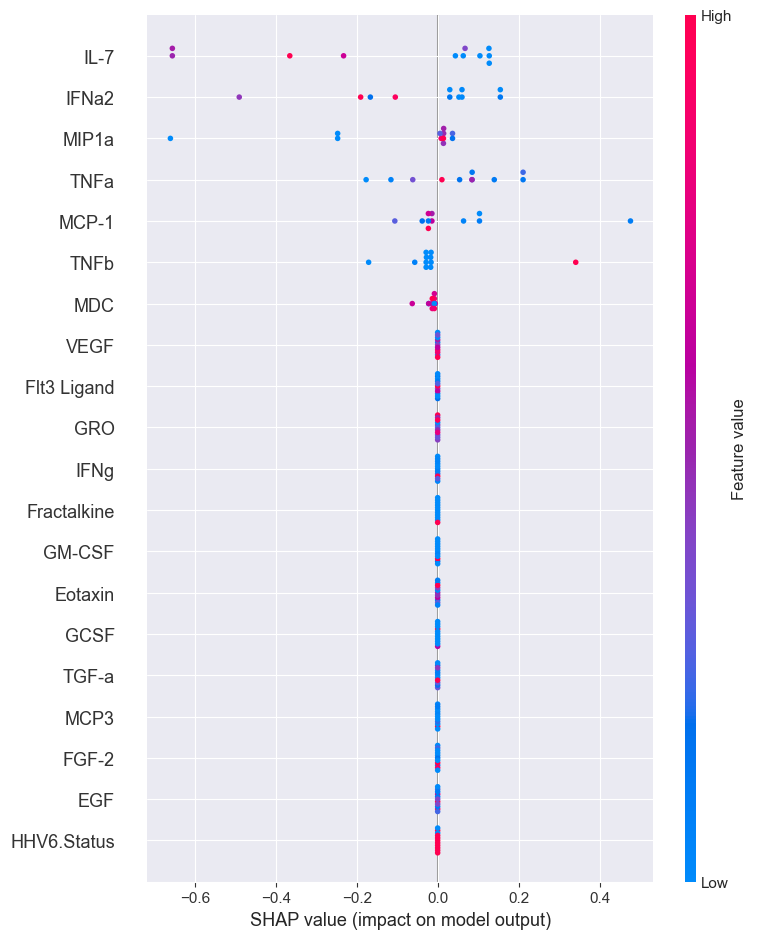

In [7]:
merged_data = pd.merge(abtiters, cytokines, on='Vaccinee')

# Drop non-numeric columns
X = merged_data.drop(columns=['Day 0', 'Day 21', 'titer_response', 'Vaccinee', 'response_label', 'vaccine'])

# Target variable
y = merged_data['response_label']

model_with_shap(X, y, 
                smote=True, 
                model=DecisionTreeClassifier(max_depth=10, random_state=42),
                shap_explainer = shap.TreeExplainer,
                random_state=42)

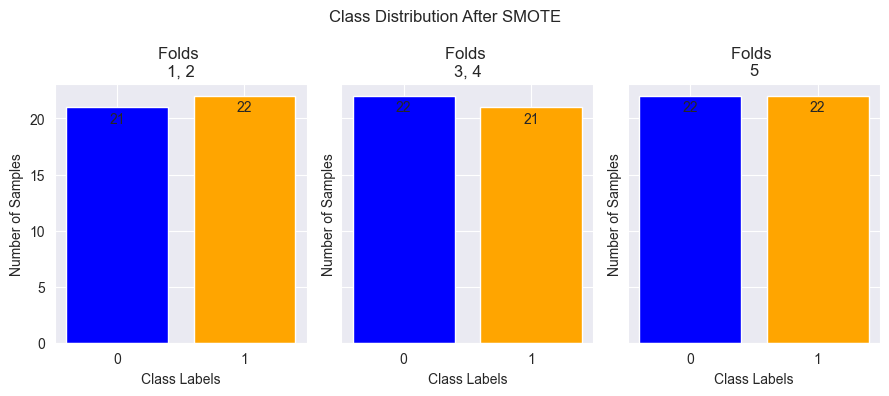

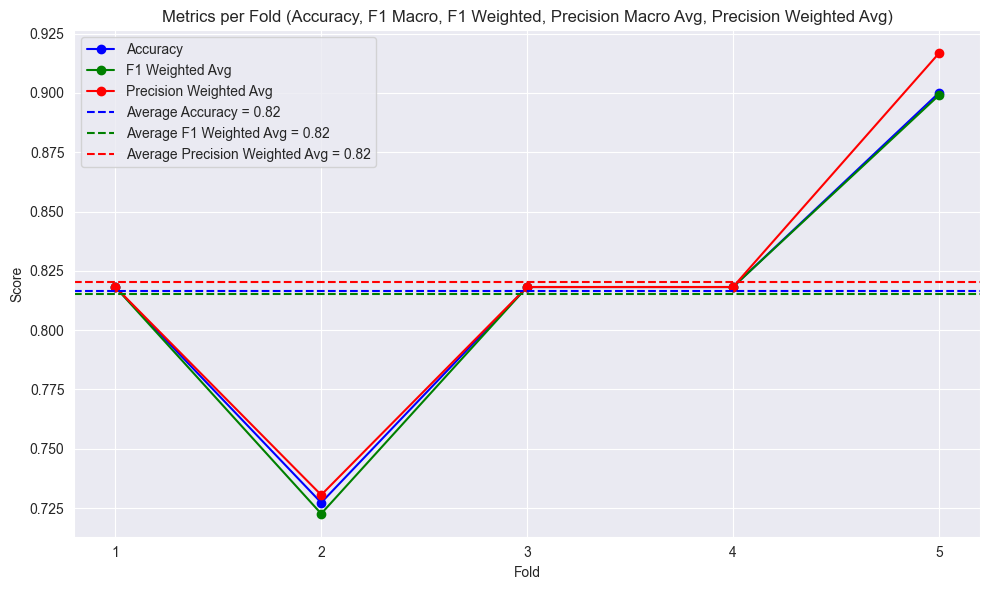

True Negatives (TN): 4.40 -> Correctly predicted negative class.
False Negatives (FN): 1.00 -> Incorrectly predicted negative class.
True Positives (TP): 4.40 -> Correctly predicted positive class.
False Positives (FP): 1.00 -> Incorrectly predicted positive class.


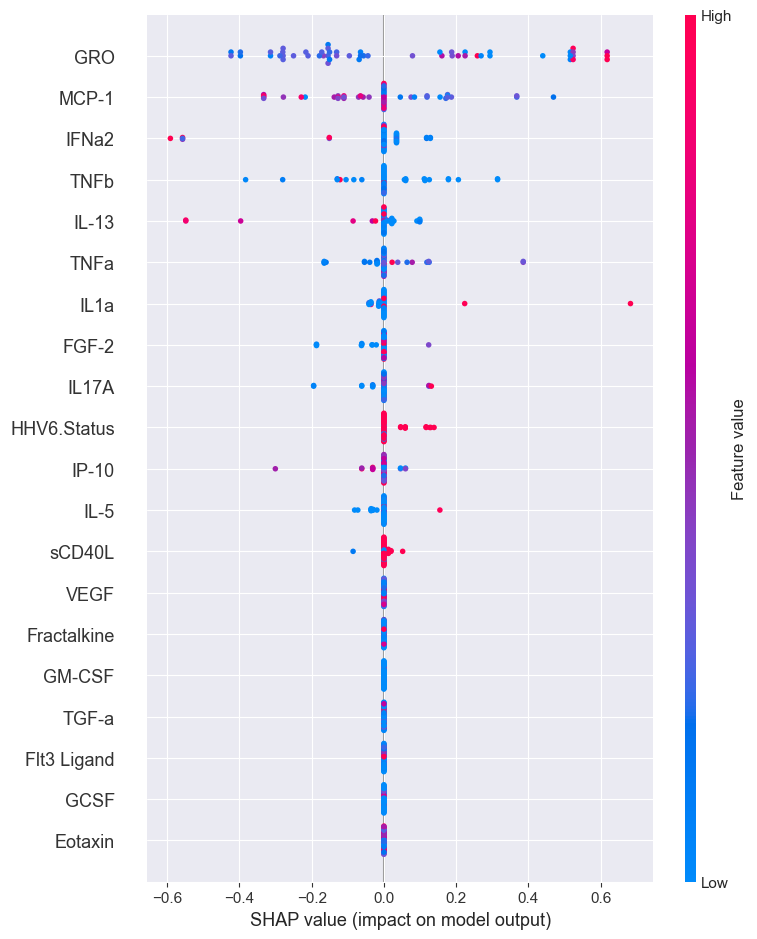

In [8]:
# Merge datasets
merged_data = pd.merge(abtiters, cytokines, on='Vaccinee')

# Drop non-numeric columns
X = merged_data.drop(columns=['Day 0', 'Day 21', 'titer_response', 'Vaccinee', 'response_label', 'vaccine'])

# Target variable
y = merged_data['response_label']

model_with_shap(X, y, 
                crossval="K-fold", 
                n_splits=5, 
                smote=True, 
                model=DecisionTreeClassifier(max_depth=10, random_state=42),
                shap_explainer = shap.TreeExplainer,
                random_state=42)

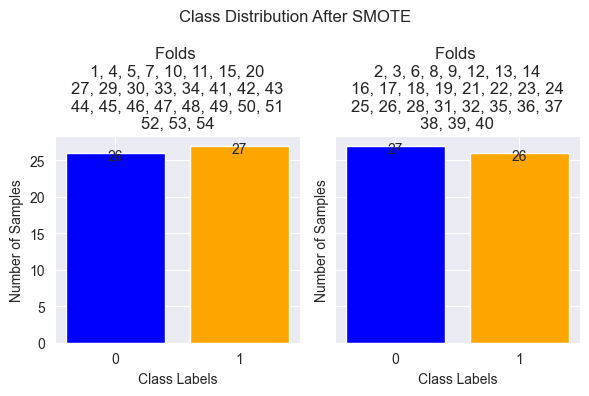

Accuracy: 0.722
f1-macro avg: 0.722
f1-weighted avg: 0.722
precision-macro avg: 0.723
precision-weighted avg: 0.723
True Negatives (TN): 19.00 -> Correctly predicted negative class.
False Negatives (FN): 7.00 -> Incorrectly predicted negative class.
True Positives (TP): 20.00 -> Correctly predicted positive class.
False Positives (FP): 8.00 -> Incorrectly predicted positive class.


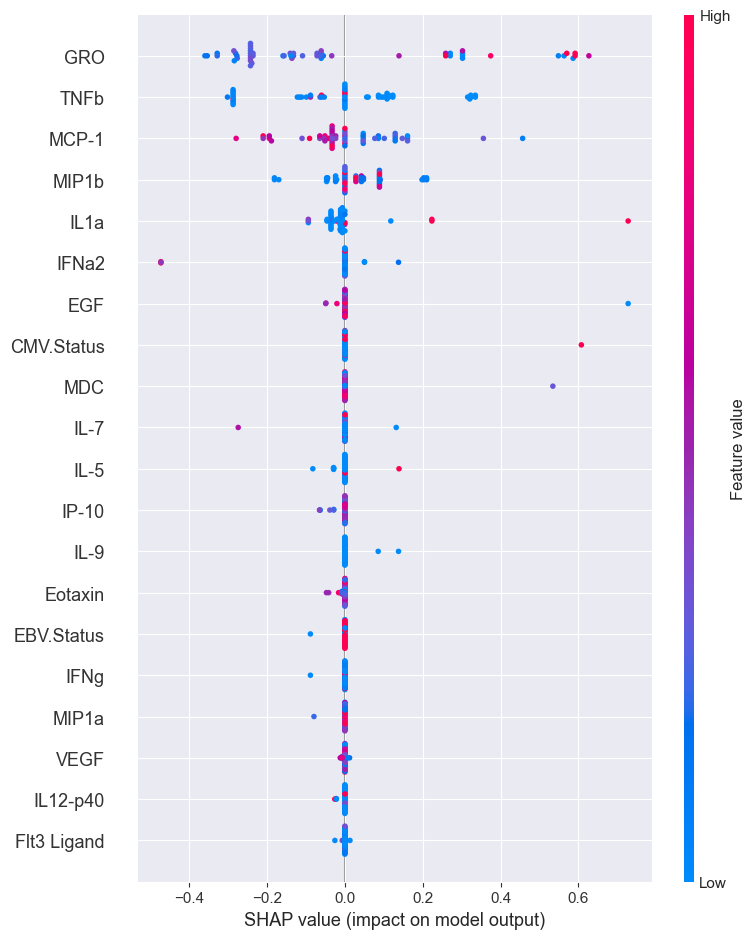

In [9]:
# Merge datasets
merged_data = pd.merge(abtiters, cytokines, on='Vaccinee')

# Drop non-numeric columns
X = merged_data.drop(columns=['Day 0', 'Day 21', 'titer_response', 'Vaccinee', 'response_label', 'vaccine'])

# Target variable
y = merged_data['response_label']

model_with_shap(X, y, 
                crossval="Leave-One-Out", 
                smote=True, 
                model=DecisionTreeClassifier(max_depth=10, random_state=42),
                shap_explainer = shap.TreeExplainer,
                random_state=42)